### Perform K-Means Clustering for the Universities_std data and identify the number of clusters formed and draw inferences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("universities_std.csv")
print(df)

    Unnamed: 0       SAT     Top10    Accept   SFRatio  Expenses  GradRate
0            0  0.743902  0.847222  0.105263  0.368421  0.255144  0.900000
1            1  1.000000  1.000000  0.144737  0.000000  1.000000  0.466667
2            2  0.621951  0.472222  0.592105  0.157895  0.297461  0.166667
3            3  0.743902  0.666667  0.131579  0.315789  0.415629  0.700000
4            4  0.670732  0.763889  0.250000  0.368421  0.239835  0.766667
5            5  0.817073  0.847222  0.118421  0.210526  0.427512  0.933333
6            6  0.756098  0.861111  0.210526  0.315789  0.416996  0.933333
7            7  0.609756  0.638889  0.131579  0.315789  0.208161  0.833333
8            8  0.963415  0.875000  0.000000  0.263158  0.561699  1.000000
9            9  0.731707  0.652778  0.394737  0.052632  0.910991  0.666667
10          10  0.914634  0.916667  0.210526  0.210526  0.476864  0.800000
11          11  0.621951  0.791667  0.328947  0.263158  0.352609  0.733333
12          12  0.609756 

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses',
       'GradRate'],
      dtype='object')


In [10]:

print(df.columns)

Index(['Unnamed: 0', 'SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses',
       'GradRate'],
      dtype='object')


In [11]:
df.drop(['Unnamed: 0', 'Top10', 'Accept', 'SFRatio', 'Expenses'], inplace = True, axis = 1)
print(df.columns)

Index(['SAT', 'GradRate'], dtype='object')


In [12]:
from sklearn.cluster import KMeans

In [19]:
wss = []
for k in range(1,11):
    kmeans_model = KMeans(n_clusters = k, random_state = 12345)
    kmeans_model.fit(df)
    wss.append(kmeans_model.inertia_)
print(wss)

[3.8642300746909912, 1.2242394645812098, 0.8614033386946337, 0.5200690891665015, 0.3854309769317205, 0.2535257434213909, 0.1926042974860643, 0.15463903288858674, 0.11401813294555707, 0.0917099830347897]


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0, 0.5, 'Sum of Squares of within cluster variations')

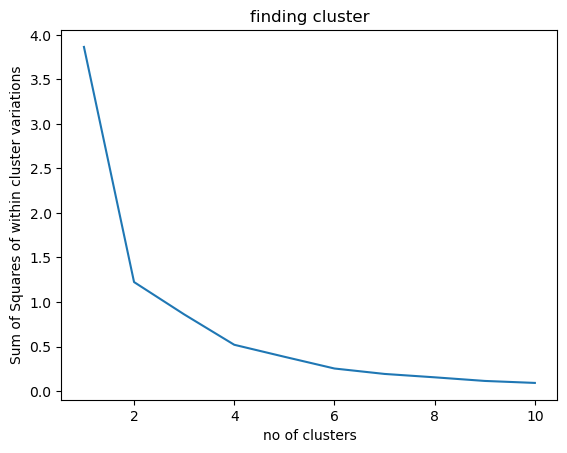

In [20]:
x = np.arange(1, 11)

plt.plot(x, wss)
plt.title("finding cluster")
plt.xlabel("no of clusters")
plt.ylabel("Sum of Squares of within cluster variations")

In [21]:
kmeans_model = KMeans(n_clusters = 4, random_state = 12345)
kmeans_model.fit(df)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=12345)

In [22]:
kmeans_model.labels_

array([2, 3, 3, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 3, 1, 1, 1,
       1, 0, 2], dtype=int32)

In [23]:
kmeans_model.cluster_centers_

array([[0.13780488, 0.15833333],
       [0.63292683, 0.74666667],
       [0.85823171, 0.91666667],
       [0.73170732, 0.33333333]])

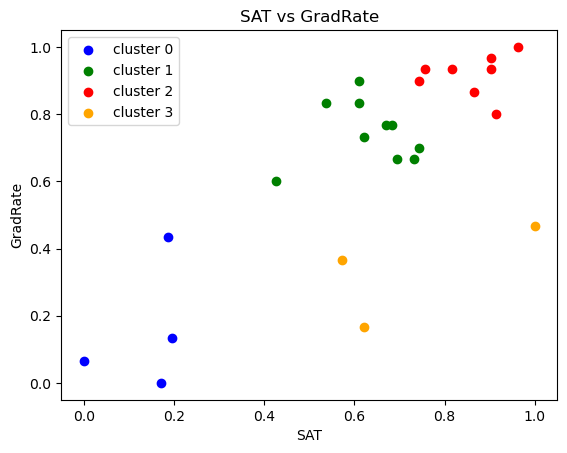

In [24]:
colors = ["blue", "green", "red", "orange"]
for cluster in range(len(kmeans_model.cluster_centers_)):
    plt.scatter(df['SAT'][kmeans_model.labels_ == cluster], 
                df['GradRate'][kmeans_model.labels_ == cluster],
                color=colors[cluster], label=f"cluster {cluster}")
plt.title("SAT vs GradRate")
plt.xlabel("SAT")
plt.ylabel("GradRate")
plt.legend()